<a href="https://colab.research.google.com/github/SanjanaSuresh30/ML_LAB_1BM22CS239/blob/main/1BM22CS239_LAB_06_KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRIS Dataset Accuracy: 1.0
Confusion Matrix for IRIS:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report for IRIS:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



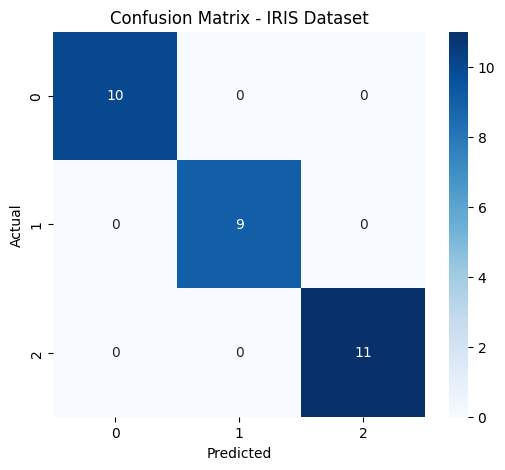

Diabetes Dataset Accuracy: 0.6818181818181818
Confusion Matrix for Diabetes:
 [[78 21]
 [28 27]]


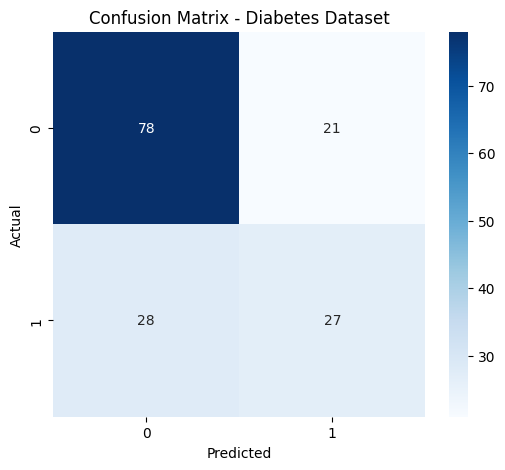

Best K value for Heart Dataset: 7
Heart Dataset Accuracy: 0.9180327868852459
Confusion Matrix for Heart:
 [[27  2]
 [ 3 29]]
Classification Report for Heart:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



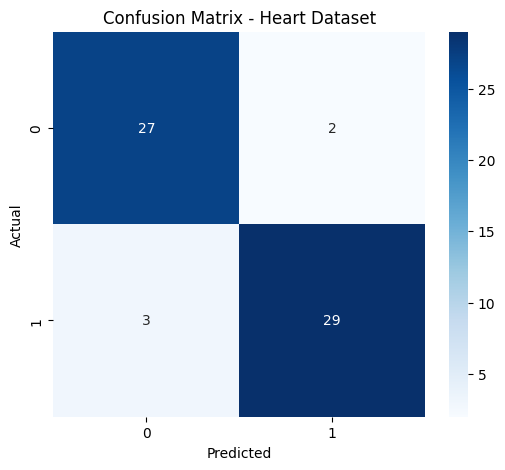

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
iris_df = pd.read_csv("/content/iris (6).csv")
diabetes_df = pd.read_csv("/content/diabetes (1).csv")
heart_df = pd.read_csv("/content/heart (1).csv")

# ---- KNN Classifier for IRIS Dataset ----
# Prepare data
X_iris = iris_df.drop(columns=['species'])  # Features
y_iris = iris_df['species']  # Target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train KNN Model
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

# Results for IRIS
print("IRIS Dataset Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix for IRIS:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report for IRIS:\n", classification_report(y_test_iris, y_pred_iris))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_iris, y_pred_iris), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - IRIS Dataset")
plt.show()

# ---- KNN Classifier for Diabetes Dataset ----
# Prepare data
X_diabetes = diabetes_df.drop(columns=['Outcome'])  # Features
y_diabetes = diabetes_df['Outcome']  # Target
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# Train KNN Model
knn_diabetes = KNeighborsClassifier(n_neighbors=7)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

# Results for Diabetes
print("Diabetes Dataset Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Confusion Matrix for Diabetes:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_diabetes, y_pred_diabetes), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Diabetes Dataset")
plt.show()

# ---- KNN Classifier for Heart Dataset ----
# Prepare data
X_heart = heart_df.drop(columns=['target'])  # Features
y_heart = heart_df['target']  # Target
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

# Feature Scaling
X_train_heart = scaler.fit_transform(X_train_heart)
X_test_heart = scaler.transform(X_test_heart)

# Find best K value
best_k = 1
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_heart, y_train_heart)
    score = knn.score(X_test_heart, y_test_heart)
    if score > best_score:
        best_k = k
        best_score = score

# Train best KNN Model
knn_heart = KNeighborsClassifier(n_neighbors=best_k)
knn_heart.fit(X_train_heart, y_train_heart)
y_pred_heart = knn_heart.predict(X_test_heart)

# Results for Heart
print(f"Best K value for Heart Dataset: {best_k}")
print("Heart Dataset Accuracy:", accuracy_score(y_test_heart, y_pred_heart))
print("Confusion Matrix for Heart:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("Classification Report for Heart:\n", classification_report(y_test_heart, y_pred_heart))

# Plot Confusion Matrix for Heart Dataset
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_heart, y_pred_heart), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Heart Dataset")
plt.show()
